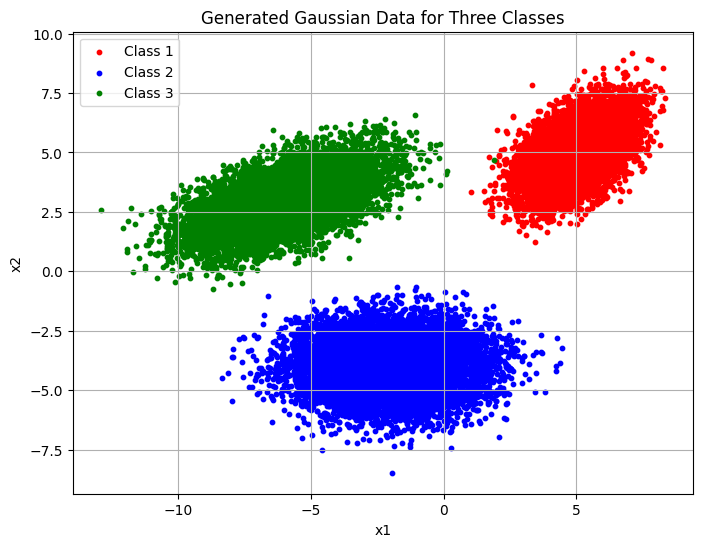

Two-Class Classification Errors: 0 out of 4000
Three-Class Classification Errors: 2 out of 6000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Exercise 1: Linear Classification
# Data generation from Gaussian distributions
np.random.seed(42)
L = int(1e4)  # Number of samples per class

# Means and covariance matrices for three classes
mu_1, sigma_1 = [5, 5], [[1, 0.5], [0.5, 1]]
mu_2, sigma_2 = [-2, -4], [[3, 0], [0, 1]]
mu_3, sigma_3 = [-6, 3], [[3, 1], [1, 1]]

# Sampling from Gaussian distributions
X_1 = np.random.multivariate_normal(mu_1, sigma_1, L)
X_2 = np.random.multivariate_normal(mu_2, sigma_2, L)
X_3 = np.random.multivariate_normal(mu_3, sigma_3, L)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', s=10, label='Class 1')
plt.scatter(X_2[:, 0], X_2[:, 1], color='blue', s=10, label='Class 2')
plt.scatter(X_3[:, 0], X_3[:, 1], color='green', s=10, label='Class 3')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.title("Generated Gaussian Data for Three Classes")
plt.show()

# Two-class classification setup (Class 1 and Class 2)
labels_1 = np.zeros((L, 2))
labels_1[:, 1] = 1  # Class 1 labeled as [0, 1]
labels_2 = np.zeros((L, 2))
labels_2[:, 0] = 1  # Class 2 labeled as [1, 0]

data_2class = np.vstack((np.hstack((X_1, labels_1)), np.hstack((X_2, labels_2))))
np.random.shuffle(data_2class)  # Randomize dataset

# Train-test split
X = data_2class[:, :2]
y = data_2class[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Least squares classification
X_train_augmented = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
W = np.linalg.pinv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train

# Perform classification on test data
X_test_augmented = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
y_pred = np.argmax(X_test_augmented @ W, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Count classification errors
errors = np.sum(y_pred != y_test_labels)
print(f"Two-Class Classification Errors: {errors} out of {len(y_test_labels)}")

# Three-class classification setup
labels_3_1 = np.array([[1, 0, 0]] * L)  # Class 1 labeled as [1, 0, 0]
labels_3_2 = np.array([[0, 1, 0]] * L)  # Class 2 labeled as [0, 1, 0]
labels_3_3 = np.array([[0, 0, 1]] * L)  # Class 3 labeled as [0, 0, 1]

data_3class = np.vstack((np.hstack((X_1, labels_3_1)),
                         np.hstack((X_2, labels_3_2)),
                         np.hstack((X_3, labels_3_3))))
np.random.shuffle(data_3class)

# Train-test split for three-class classification
X = data_3class[:, :2]
y = data_3class[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Least squares for three-class classification
X_train_augmented = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
W = np.linalg.pinv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train

# Perform classification on test data
X_test_augmented = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
y_pred = np.argmax(X_test_augmented @ W, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Count classification errors
errors = np.sum(y_pred != y_test_labels)
print(f"Three-Class Classification Errors: {errors} out of {len(y_test_labels)}")


In [2]:
# Exercise 2: Perceptron for Two-Class Classification
def perceptron_train(X, y, learning_rate=0.01, epochs=100):
    weights = np.zeros(X.shape[1])
    bias = 0
    for _ in range(epochs):
        for xi, target in zip(X, y):
            update = learning_rate * (target - predict(xi, weights, bias))
            weights += update * xi
            bias += update
    return weights, bias

def predict(x, weights, bias):
    return 1 if np.dot(x, weights) + bias >= 0 else 0

# Prepare data for perceptron (Class 1 vs Class 2)
X = data_2class[:, :2]
y = np.argmax(data_2class[:, 2:], axis=1)  # Convert one-hot to single labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train perceptron
weights, bias = perceptron_train(X_train, y_train, learning_rate=0.01, epochs=100)

# Evaluate perceptron
y_pred = [predict(x, weights, bias) for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy: {accuracy * 100:.2f}%")

Perceptron Accuracy: 100.00%


In [3]:
# Exercise 3: Logistic Regression for Two-Class Classification
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_train(X, y, learning_rate=0.1, epochs=100):
    weights = np.zeros(X.shape[1])
    bias = 0
    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        predictions = sigmoid(linear_model)
        gradient_weights = np.dot(X.T, (predictions - y)) / len(y)
        gradient_bias = np.sum(predictions - y) / len(y)
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
    return weights, bias

# Prepare data for logistic regression
X = data_2class[:, :2]
y = np.argmax(data_2class[:, 2:], axis=1)  # Convert one-hot to single labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.1, epochs=100)

# Evaluate logistic regression
y_pred = [1 if sigmoid(np.dot(x, weights) + bias) >= 0.5 else 0 for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 100.00%


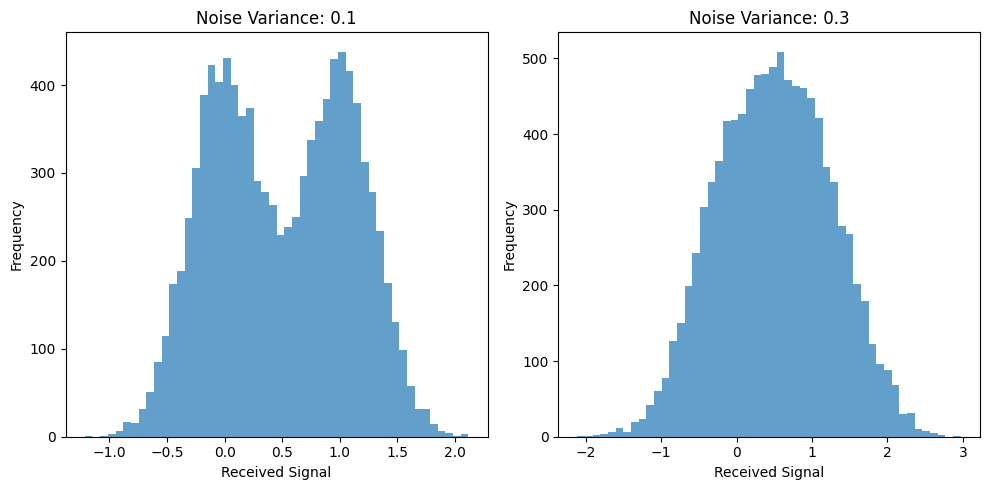

Logistic Regression Accuracy for Noisy Channel: 91.45%


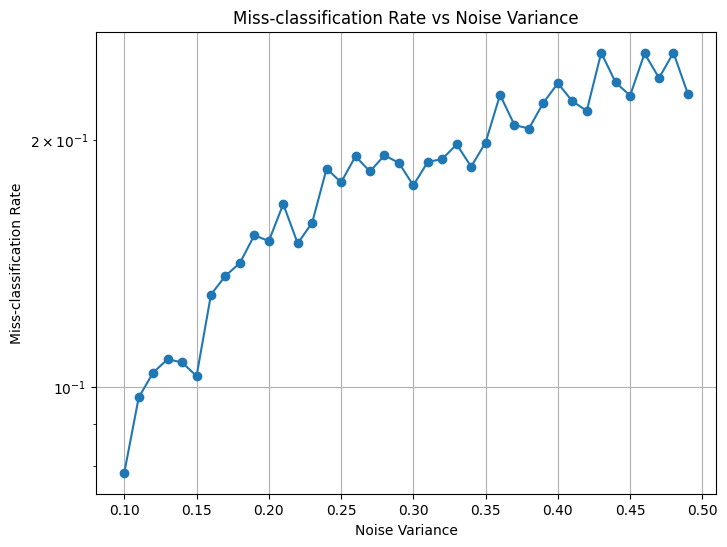

In [4]:
# Exercise 4: Logistic Regression for Noisy Channel Data
# Simulate noisy channel data
np.random.seed(42)
L = int(1e4)
original_bits = np.random.randint(0, 2, L)
noise_variances = [0.1, 0.3]

# Plot histograms for different noise variances
plt.figure(figsize=(10, 5))
for i, sigma_n in enumerate(noise_variances):
    noise = np.random.normal(0, np.sqrt(sigma_n), L)
    received_signal = original_bits + noise
    plt.subplot(1, 2, i + 1)
    plt.hist(received_signal, bins=50, alpha=0.7)
    plt.title(f"Noise Variance: {sigma_n}")
    plt.xlabel("Received Signal")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Train logistic regression on noisy data
sigma_n = 0.1
noise = np.random.normal(0, np.sqrt(sigma_n), L)
received_signal = original_bits + noise

# Prepare dataset
X = received_signal.reshape(-1, 1)
y = original_bits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.1, epochs=100)

# Evaluate logistic regression
y_pred = [1 if sigmoid(np.dot(x, weights) + bias) >= 0.5 else 0 for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy for Noisy Channel: {accuracy * 100:.2f}%")

# Miss-classification rate for varying noise variances
miss_classification_rates = []
noise_variances = np.arange(0.1, 0.5, 0.01)
for sigma_n in noise_variances:
    noise = np.random.normal(0, np.sqrt(sigma_n), L)
    received_signal = original_bits + noise
    X = received_signal.reshape(-1, 1)
    y = original_bits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.1, epochs=100)
    y_pred = [1 if sigmoid(np.dot(x, weights) + bias) >= 0.5 else 0 for x in X_test]
    miss_classification_rate = 1 - accuracy_score(y_test, y_pred)
    miss_classification_rates.append(miss_classification_rate)

# Plot miss-classification rate
plt.figure(figsize=(8, 6))
plt.plot(noise_variances, miss_classification_rates, marker='o')
plt.yscale('log')
plt.xlabel("Noise Variance")
plt.ylabel("Miss-classification Rate")
plt.title("Miss-classification Rate vs Noise Variance")
plt.grid()
plt.show()

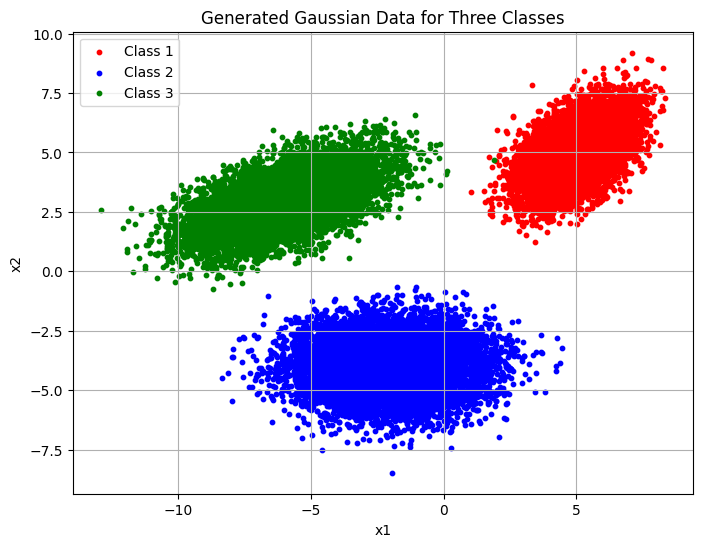

Two-Class Classification Errors: 0 out of 4000
Three-Class Classification Errors: 2 out of 6000
Perceptron Accuracy: 100.00%
Logistic Regression Accuracy: 100.00%


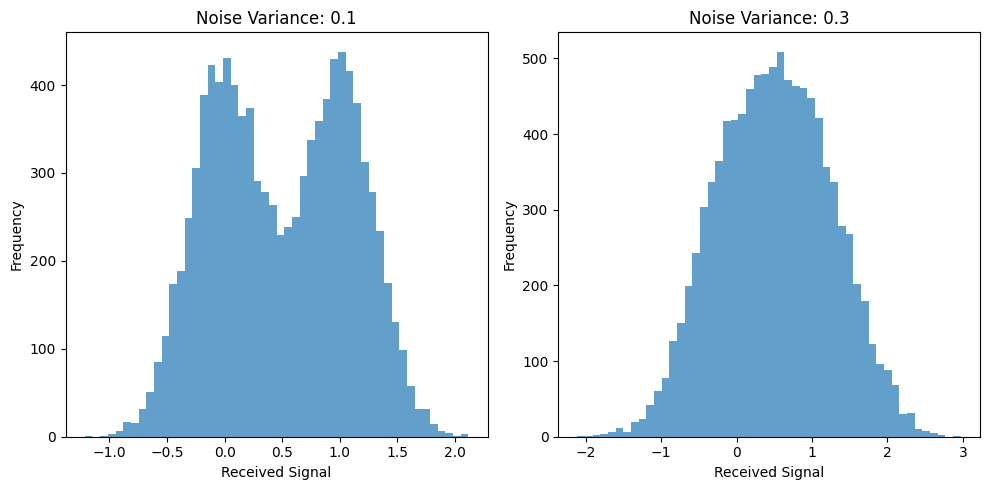

Logistic Regression Accuracy for Noisy Channel: 91.45%


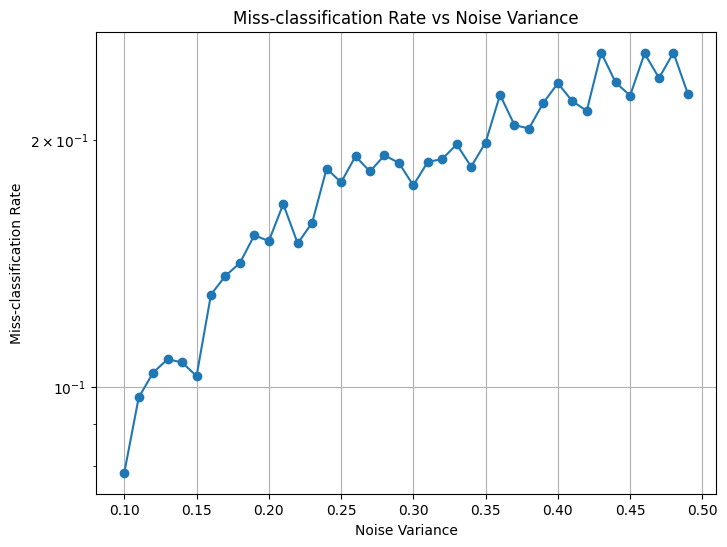

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Exercise 1: Linear Classification
# Data generation from Gaussian distributions
np.random.seed(42)
L = int(1e4)  # Number of samples per class

# Means and covariance matrices for three classes
mu_1, sigma_1 = [5, 5], [[1, 0.5], [0.5, 1]]
mu_2, sigma_2 = [-2, -4], [[3, 0], [0, 1]]
mu_3, sigma_3 = [-6, 3], [[3, 1], [1, 1]]

# Sampling from Gaussian distributions
X_1 = np.random.multivariate_normal(mu_1, sigma_1, L)
X_2 = np.random.multivariate_normal(mu_2, sigma_2, L)
X_3 = np.random.multivariate_normal(mu_3, sigma_3, L)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', s=10, label='Class 1')
plt.scatter(X_2[:, 0], X_2[:, 1], color='blue', s=10, label='Class 2')
plt.scatter(X_3[:, 0], X_3[:, 1], color='green', s=10, label='Class 3')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.title("Generated Gaussian Data for Three Classes")
plt.show()

# Two-class classification setup (Class 1 and Class 2)
labels_1 = np.zeros((L, 2))
labels_1[:, 1] = 1  # Class 1 labeled as [0, 1]
labels_2 = np.zeros((L, 2))
labels_2[:, 0] = 1  # Class 2 labeled as [1, 0]

data_2class = np.vstack((np.hstack((X_1, labels_1)), np.hstack((X_2, labels_2))))
np.random.shuffle(data_2class)  # Randomize dataset

# Train-test split
X = data_2class[:, :2]
y = data_2class[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Least squares classification
X_train_augmented = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
W = np.linalg.pinv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train

# Perform classification on test data
X_test_augmented = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
y_pred = np.argmax(X_test_augmented @ W, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Count classification errors
errors = np.sum(y_pred != y_test_labels)
print(f"Two-Class Classification Errors: {errors} out of {len(y_test_labels)}")

# Three-class classification setup
labels_3_1 = np.array([[1, 0, 0]] * L)  # Class 1 labeled as [1, 0, 0]
labels_3_2 = np.array([[0, 1, 0]] * L)  # Class 2 labeled as [0, 1, 0]
labels_3_3 = np.array([[0, 0, 1]] * L)  # Class 3 labeled as [0, 0, 1]

data_3class = np.vstack((np.hstack((X_1, labels_3_1)),
                         np.hstack((X_2, labels_3_2)),
                         np.hstack((X_3, labels_3_3))))
np.random.shuffle(data_3class)

# Train-test split for three-class classification
X = data_3class[:, :2]
y = data_3class[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Least squares for three-class classification
X_train_augmented = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
W = np.linalg.pinv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train

# Perform classification on test data
X_test_augmented = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
y_pred = np.argmax(X_test_augmented @ W, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Count classification errors
errors = np.sum(y_pred != y_test_labels)
print(f"Three-Class Classification Errors: {errors} out of {len(y_test_labels)}")

# Exercise 2: Perceptron for Two-Class Classification
def perceptron_train(X, y, learning_rate=0.01, epochs=100):
    weights = np.zeros(X.shape[1])
    bias = 0
    for _ in range(epochs):
        for xi, target in zip(X, y):
            update = learning_rate * (target - predict(xi, weights, bias))
            weights += update * xi
            bias += update
    return weights, bias

def predict(x, weights, bias):
    return 1 if np.dot(x, weights) + bias >= 0 else 0

# Prepare data for perceptron (Class 1 vs Class 2)
X = data_2class[:, :2]
y = np.argmax(data_2class[:, 2:], axis=1)  # Convert one-hot to single labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train perceptron
weights, bias = perceptron_train(X_train, y_train, learning_rate=0.01, epochs=100)

# Evaluate perceptron
y_pred = [predict(x, weights, bias) for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy: {accuracy * 100:.2f}%")

# Exercise 3: Logistic Regression for Two-Class Classification
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_train(X, y, learning_rate=0.1, epochs=100):
    weights = np.zeros(X.shape[1])
    bias = 0
    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        predictions = sigmoid(linear_model)
        gradient_weights = np.dot(X.T, (predictions - y)) / len(y)
        gradient_bias = np.sum(predictions - y) / len(y)
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
    return weights, bias

# Prepare data for logistic regression
X = data_2class[:, :2]
y = np.argmax(data_2class[:, 2:], axis=1)  # Convert one-hot to single labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.1, epochs=100)

# Evaluate logistic regression
y_pred = [1 if sigmoid(np.dot(x, weights) + bias) >= 0.5 else 0 for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

# Exercise 4: Logistic Regression for Noisy Channel Data
# Simulate noisy channel data
np.random.seed(42)
L = int(1e4)
original_bits = np.random.randint(0, 2, L)
noise_variances = [0.1, 0.3]

# Plot histograms for different noise variances
plt.figure(figsize=(10, 5))
for i, sigma_n in enumerate(noise_variances):
    noise = np.random.normal(0, np.sqrt(sigma_n), L)
    received_signal = original_bits + noise
    plt.subplot(1, 2, i + 1)
    plt.hist(received_signal, bins=50, alpha=0.7)
    plt.title(f"Noise Variance: {sigma_n}")
    plt.xlabel("Received Signal")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Train logistic regression on noisy data
sigma_n = 0.1
noise = np.random.normal(0, np.sqrt(sigma_n), L)
received_signal = original_bits + noise

# Prepare dataset
X = received_signal.reshape(-1, 1)
y = original_bits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.1, epochs=100)

# Evaluate logistic regression
y_pred = [1 if sigmoid(np.dot(x, weights) + bias) >= 0.5 else 0 for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy for Noisy Channel: {accuracy * 100:.2f}%")

# Miss-classification rate for varying noise variances
miss_classification_rates = []
noise_variances = np.arange(0.1, 0.5, 0.01)
for sigma_n in noise_variances:
    noise = np.random.normal(0, np.sqrt(sigma_n), L)
    received_signal = original_bits + noise
    X = received_signal.reshape(-1, 1)
    y = original_bits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.1, epochs=100)
    y_pred = [1 if sigmoid(np.dot(x, weights) + bias) >= 0.5 else 0 for x in X_test]
    miss_classification_rate = 1 - accuracy_score(y_test, y_pred)
    miss_classification_rates.append(miss_classification_rate)

# Plot miss-classification rate
plt.figure(figsize=(8, 6))
plt.plot(noise_variances, miss_classification_rates, marker='o')
plt.yscale('log')
plt.xlabel("Noise Variance")
plt.ylabel("Miss-classification Rate")
plt.title("Miss-classification Rate vs Noise Variance")
plt.grid()
plt.show()


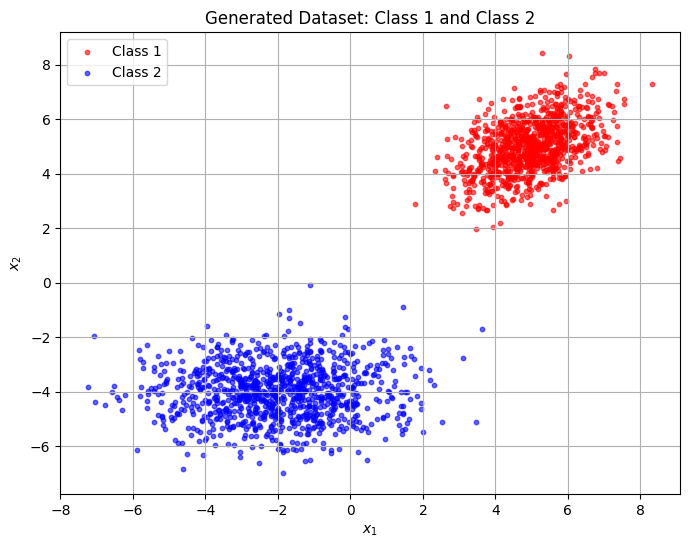

Least Squares - Errors: 0, Accuracy: 100.00%
Perceptron - Errors: 0, Accuracy: 100.00%
Logistic Regression - Errors: 0, Accuracy: 100.00%


In [6]:
# Re-import libraries and reinitialize due to reset
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Parameters for dataset generation
L = 1000  # Number of samples per class
np.random.seed(42)

# Class 1 parameters
mu_1, Sigma_1 = [5, 5], [[1, 0.5], [0.5, 1]]
X_1 = np.random.multivariate_normal(mu_1, Sigma_1, L)
y_1 = np.ones((L,))  # Label for Class 1: +1

# Class 2 parameters
mu_2, Sigma_2 = [-2, -4], [[3, 0], [0, 1]]
X_2 = np.random.multivariate_normal(mu_2, Sigma_2, L)
y_2 = np.zeros((L,))  # Label for Class 2: 0

# Combine and shuffle dataset
X = np.vstack([X_1, X_2])
y = np.hstack([y_1, y_2])
indices = np.arange(len(X))
np.random.shuffle(indices)
X, y = X[indices], y[indices]

# Split into training (80%) and testing (20%)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Visualization of Dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', label='Class 1', alpha=0.6, s=10)
plt.scatter(X_2[:, 0], X_2[:, 1], color='blue', label='Class 2', alpha=0.6, s=10)
plt.title("Generated Dataset: Class 1 and Class 2")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid()
plt.show()

# Function for Least Squares
def least_squares(X, y):
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    y_one_hot = np.eye(2)[y.astype(int)]  # Convert labels to one-hot encoding
    W = np.linalg.pinv(X_bias) @ y_one_hot  # Least squares solution
    return W

# Train Least Squares
W_ls = least_squares(X_train, y_train)
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
y_pred_ls = np.argmax(X_test_bias @ W_ls, axis=1)
errors_ls = np.sum(y_pred_ls != y_test)
accuracy_ls = 100 * (1 - errors_ls / len(y_test))

# Perceptron Implementation
def perceptron(X, y, eta=0.01, max_iter=1000):
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    weights = np.zeros(X_bias.shape[1])
    errors = []
    for _ in range(max_iter):
        error_count = 0
        for xi, yi in zip(X_bias, y):
            prediction = np.sign(np.dot(weights, xi))
            if prediction != 2 * yi - 1:  # Convert 0/1 to -1/1
                weights += eta * (2 * yi - 1) * xi
                error_count += 1
        errors.append(error_count)
        if error_count == 0:
            break
    return weights, errors

# Train Perceptron
w_perceptron, train_errors = perceptron(X_train, y_train)

# Test Perceptron
y_pred_perceptron = np.sign(X_test_bias @ w_perceptron) > 0
errors_perceptron = np.sum(y_pred_perceptron != y_test)
accuracy_perceptron = 100 * (1 - errors_perceptron / len(y_test))

# Logistic Regression Implementation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, eta=0.1, max_iter=500):
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    weights = np.zeros(X_bias.shape[1])
    losses = []
    for _ in range(max_iter):
        z = np.dot(X_bias, weights)
        y_pred = sigmoid(z)
        loss = -np.mean(y * np.log(y_pred + 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
        losses.append(loss)
        gradient = np.dot(X_bias.T, (y_pred - y)) / len(y)
        weights -= eta * gradient
    return weights, losses

# Train Logistic Regression
w_logistic, losses = logistic_regression(X_train, y_train)

# Test Logistic Regression
y_pred_logistic = sigmoid(np.dot(X_test_bias, w_logistic)) >= 0.5
errors_logistic = np.sum(y_pred_logistic != y_test)
accuracy_logistic = 100 * (1 - errors_logistic / len(y_test))

# Visualize Training Errors and Losses
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=list(range(1, len(train_errors) + 1)),
    y=train_errors,
    mode='lines+markers',
    name='Perceptron Training Errors'
))
fig.add_trace(go.Scatter(
    x=list(range(1, len(losses) + 1)),
    y=losses,
    mode='lines+markers',
    name='Logistic Regression Loss'
))
fig.update_layout(
    title="Error and Loss Over Iterations",
    xaxis_title="Iterations",
    yaxis_title="Error / Loss",
    template="plotly_white"
)
fig.show()

# Print Results
print(f"Least Squares - Errors: {errors_ls}, Accuracy: {accuracy_ls:.2f}%")
print(f"Perceptron - Errors: {errors_perceptron}, Accuracy: {accuracy_perceptron:.2f}%")
print(f"Logistic Regression - Errors: {errors_logistic}, Accuracy: {accuracy_logistic:.2f}%")


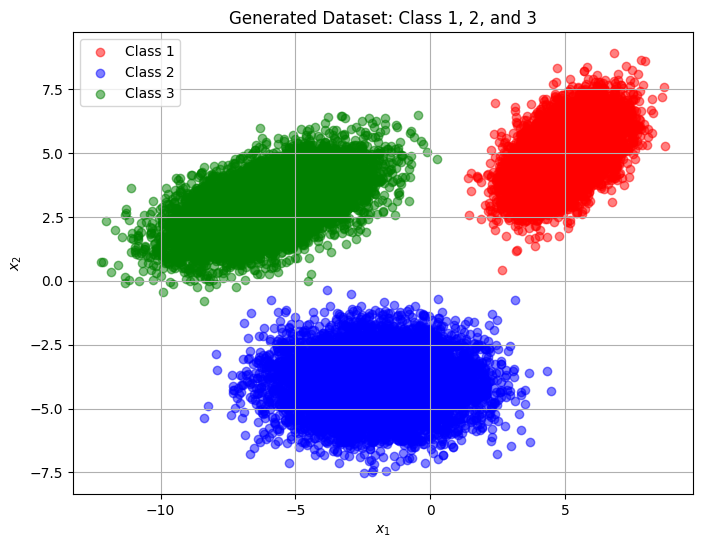

Two-class dataset shape: (20000, 3)
Three-class dataset shape: (30000, 5)


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples per class
L = 10000

# Class 1 parameters
mu_1, Sigma_1 = [5, 5], [[1, 0.5], [0.5, 1]]
X_1 = np.random.multivariate_normal(mu_1, Sigma_1, L)

# Class 2 parameters
mu_2, Sigma_2 = [-2, -4], [[3, 0], [0, 1]]
X_2 = np.random.multivariate_normal(mu_2, Sigma_2, L)

# Class 3 parameters
mu_3, Sigma_3 = [-6, 3], [[3, 1], [1, 1]]
X_3 = np.random.multivariate_normal(mu_3, Sigma_3, L)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', label='Class 1', alpha=0.5)
plt.scatter(X_2[:, 0], X_2[:, 1], color='blue', label='Class 2', alpha=0.5)
plt.scatter(X_3[:, 0], X_3[:, 1], color='green', label='Class 3', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Generated Dataset: Class 1, 2, and 3')
plt.legend()
plt.grid()
plt.show()

# Generate labels for two-class classification
C_1 = np.zeros((L,))
C_2 = np.zeros((L,))

# Combine samples and labels for two-class dataset
data_two_classes = np.vstack([np.hstack([X_1, C_1[:, None]]), np.hstack([X_2, C_2[:,None]])])
np.random.shuffle(data_two_classes)  # Shuffle the dataset

# Generate labels for three-class classification
C_1_3 = np.tile([1, 0, 0], (L, 1))  # Class 1: [1, 0, 0]
C_2_3 = np.tile([0, 1, 0], (L, 1))  # Class 2: [0, 1, 0]
C_3_3 = np.tile([0, 0, 1], (L, 1))  # Class 3: [0, 0, 1]

# Combine samples and labels for three-class dataset
data_three_classes = np.vstack([
    np.hstack([X_1, C_1_3]),
    np.hstack([X_2, C_2_3]),
    np.hstack([X_3, C_3_3])
])
np.random.shuffle(data_three_classes)  # Shuffle the dataset

# Check dimensions of datasets
print("Two-class dataset shape:", data_two_classes.shape)
print("Three-class dataset shape:", data_three_classes.shape)

In [42]:
import numpy as np

# Helper function for sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Least Squares Classifier
def least_squares(X, y):
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    W = np.linalg.pinv(X_bias) @ y  # Least squares solution
    return W

# Perceptron Classifier
def perceptron(X, y, eta=0.01, max_iter=1000):
    X = X.reshape(-1, 1) if X.ndim == 1 else X  # Ensure X is 2D
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    weights = np.zeros(X_bias.shape[1])
    errors = []

    # Convert labels to -1/+1 for perceptron
    y_signed = np.where(y == 1, 1, -1)

    for _ in range(max_iter):
        error_count = 0
        for xi, yi in zip(X_bias, y_signed):
            if np.sign(np.dot(weights, xi)) != yi:
                weights += eta * yi * xi
                error_count += 1
        errors.append(error_count)
        if error_count == 0:  # Early stopping
            break
    return weights, errors

# Logistic Regression
def logistic_regression(X, y, eta=0.1, max_iter=500):
    X = X.reshape(-1, 1) if X.ndim == 1 else X  # Ensure X is 2D
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    weights = np.zeros(X_bias.shape[1])
    losses = []

    for _ in range(max_iter):
        z = np.dot(X_bias, weights)
        y_pred = sigmoid(z)
        loss = -np.mean(y * np.log(y_pred + 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
        losses.append(loss)

        gradient = np.dot(X_bias.T, (y_pred - y)) / len(y)
        weights -= eta * gradient

    return weights, losses

# Split data into training and testing
train_size = int(0.8 * len(data_two_classes))
X_train = data_two_classes[:train_size, :2]  # Features
y_train = data_two_classes[:train_size, 2]  # Scalar labels
X_test = data_two_classes[train_size:, :2]
y_test = data_two_classes[train_size:, 2]  # Scalar labels

# Least Squares Classification
W_ls = least_squares(X_train, y_train)
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
y_pred_ls = np.sign(X_test_bias @ W_ls)  # Predict using sign
errors_ls = np.sum((y_pred_ls > 0) != (y_test == 1))  # Binary classification
accuracy_ls = 100 * (1 - errors_ls / len(y_test))
print(f"Least Squares - Errors: {errors_ls}, Accuracy: {accuracy_ls:.2f}%")

# Perceptron Classification
weights_perceptron, perceptron_errors = perceptron(X_train, y_train)
y_pred_perceptron = np.sign(X_test_bias @ weights_perceptron)  # Predict using sign
errors_perceptron = np.sum((y_pred_perceptron > 0) != (y_test == 1))
accuracy_perceptron = 100 * (1 - errors_perceptron / len(y_test))
print(f"Perceptron - Errors: {errors_perceptron}, Accuracy: {accuracy_perceptron:.2f}%")

# Logistic Regression Classification
weights_logistic, logistic_losses = logistic_regression(X_train, y_train)
y_pred_logistic = sigmoid(np.dot(X_test_bias, weights_logistic)) >= 0.5
errors_logistic = np.sum(y_pred_logistic != (y_test == 1))
accuracy_logistic = 100 * (1 - errors_logistic / len(y_test))
print(f"Logistic Regression - Errors: {errors_logistic}, Accuracy: {accuracy_logistic:.2f}%")


Least Squares - Errors: 0, Accuracy: 100.00%
Perceptron - Errors: 0, Accuracy: 100.00%
Logistic Regression - Errors: 0, Accuracy: 100.00%


c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



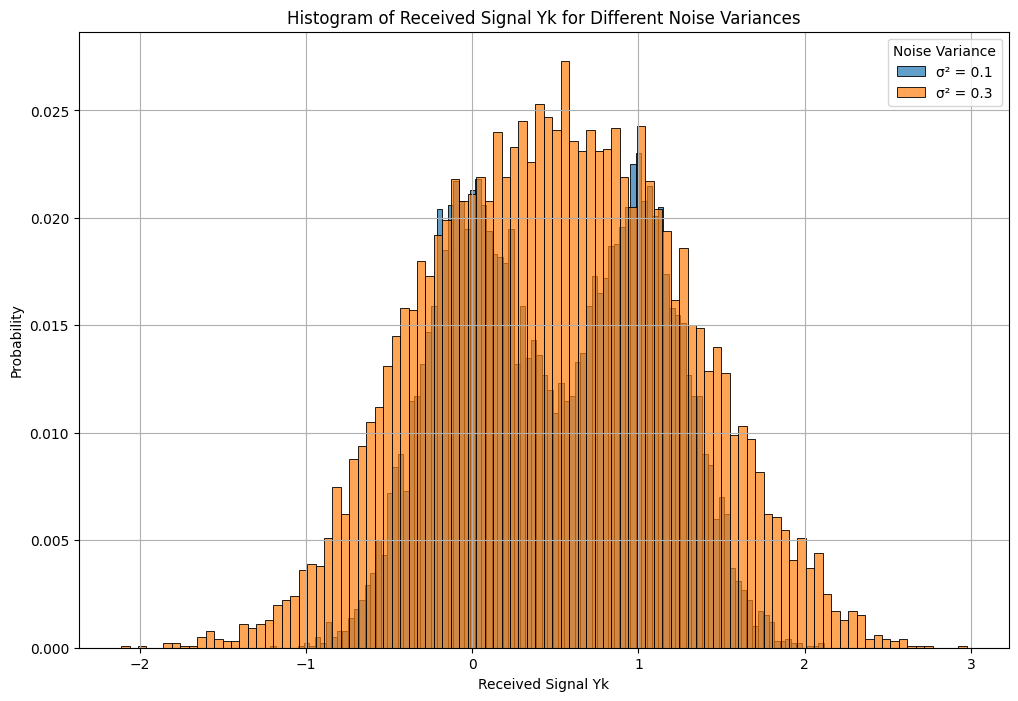

c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



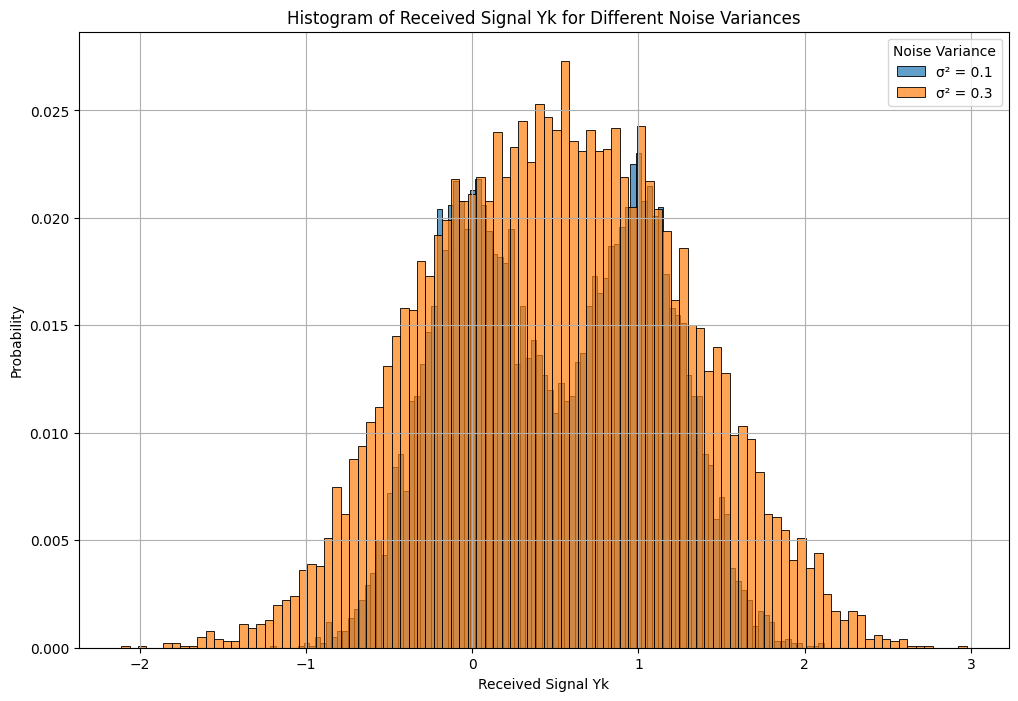

In [58]:
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

# Parameters
np.random.seed(42)
L = 10000  # Number of bits
sigma_values = [0.1, 0.3]  # Noise variances

# Generate transmitted bits (0 or 1)
X_k = np.random.choice([0, 1], size=L)

# Add Gaussian noise to create received signal
Y_k_dict = {sigma: X_k + np.random.normal(0, np.sqrt(sigma), L) for sigma in sigma_values}

# Prepare data for cleaner histogram visualization
fig = go.Figure()

for sigma, Y_k in Y_k_dict.items():
    fig.add_trace(go.Histogram(
        x=Y_k,
        nbinsx=50,
        name=f"σ² = {sigma}",
        opacity=0.7,
        histnorm='probability'  # Normalize to probability
    ))

    # Plot histograms using seaborn
    plt.figure(figsize=(12, 8))
    for sigma, Y_k in Y_k_dict.items():
        sns.histplot(Y_k, bins=100, kde=False, stat="probability", label=f"σ² = {sigma}", alpha=0.7)

    # Update layout for better visualization
    plt.title("Histogram of Received Signal Yk for Different Noise Variances")
    plt.xlabel("Received Signal Yk")
    plt.ylabel("Probability")
    plt.legend(title="Noise Variance")
    plt.grid(True)
    plt.show()

# Update layout for better visualization
fig.update_layout(
    title="Histogram of Received Signal Yk for Different Noise Variances",
    xaxis_title="Received Signal Yk",
    yaxis_title="Probability",
    barmode="overlay",  # Overlay histograms for comparison
    template="plotly_white",
    legend=dict(title="Noise Variance", font=dict(size=18)),
    height=700,
    xaxis=dict(titlefont=dict(size=18), tickfont=dict(size=14)),
    yaxis=dict(titlefont=dict(size=18), tickfont=dict(size=14)),
)

# Show plot
fig.show()

In [48]:
import numpy as np
import plotly.graph_objects as go

# Logistic regression implementation with weight tracking
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_with_weights(X, y, eta=0.1, max_iter=500):
    X_bias = np.hstack([np.ones((len(X), 1)), X.reshape(-1, 1)])  # Add bias term
    weights = np.zeros(2)  # Initialize weights (1 feature + bias)
    losses = []
    weight_evolution = []

    for _ in range(max_iter):
        z = np.dot(X_bias, weights)
        y_pred = sigmoid(z)
        loss = -np.mean(y * np.log(y_pred + 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
        losses.append(loss)
        weight_evolution.append(weights.copy())

        gradient = np.dot(X_bias.T, y_pred - y) / len(y)
        weights -= eta * gradient

    return weights, losses, np.array(weight_evolution)

# Parameters
L = 10000  # Number of bits
np.random.seed(42)

# Generate transmitted bits (0 or 1)
X_k = np.random.choice([0, 1], size=L)

# Noise-free case (σ^2 = 0)
Y_k_no_noise = X_k.copy()  # Received signal with no noise

# Split into training and testing sets (80% train, 20% test)
X_train, X_test = Y_k_no_noise[:int(0.8 * L)], Y_k_no_noise[int(0.8 * L):]
y_train, y_test = X_k[:int(0.8 * L)], X_k[int(0.8 * L):]

# Train logistic regression on noise-free data
eta = 0.1
max_iter = 500
weights, losses, weight_evolution = logistic_regression_with_weights(X_train, y_train, eta, max_iter)

# Plot the evolution of cross-entropy loss
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(
    x=list(range(1, len(losses) + 1)),
    y=losses,
    mode='lines+markers',
    name="Cross-Entropy Loss"
))
fig_loss.update_layout(
    title="Cross-Entropy Loss Over Iterations (Noise-Free Case)",
    xaxis_title="Iteration",
    yaxis_title="Loss",
    template="plotly_white", 
    height=700,
    xaxis=dict(titlefont=dict(size=18), tickfont=dict(size=14)),
    yaxis=dict(titlefont=dict(size=18), tickfont=dict(size=14)),
    legend=dict(font=dict(size=18))
)
fig_loss.show()

# Plot weight evolution over iterations
fig_weights = go.Figure()
for i in range(weight_evolution.shape[1]):
    fig_weights.add_trace(go.Scatter(
        x=list(range(1, weight_evolution.shape[0] + 1)),
        y=weight_evolution[:, i],
        mode='lines+markers',
        name=f"Weight {i}"
    ))
fig_weights.update_layout(
    title="Weight Evolution Over Iterations (Noise-Free Case)",
    xaxis_title="Iteration",
    yaxis_title="Weight Value",
    template="plotly_white",
    height=700,
    xaxis=dict(titlefont=dict(size=18), tickfont=dict(size=14)),
    yaxis=dict(titlefont=dict(size=18), tickfont=dict(size=14)),
    legend=dict(font=dict(size=18))
    
)
fig_weights.show()

# Evaluate logistic regression on test set
X_test_bias = np.hstack([np.ones((len(X_test), 1)), X_test.reshape(-1, 1)])
y_pred = sigmoid(np.dot(X_test_bias, weights)) >= 0.5
errors = np.sum(y_pred != y_test)
accuracy = 100 * (1 - errors / len(y_test))

print(f"Logistic Regression (Noise-Free) - Errors: {errors}, Accuracy: {accuracy:.2f}%")

Logistic Regression (Noise-Free) - Errors: 0, Accuracy: 100.00%


In [60]:
# Test model performance across noise variances
noise_variances = np.arange(0.1, 0.41, 0.01)
misclassification_rates = []
L_noise = 10000

for sigma in noise_variances:
    noise = np.random.normal(0, np.sqrt(sigma), L_noise)
    Y_k = X_k + noise
    X_train, X_test = Y_k[:int(0.8 * L_noise)], Y_k[int(0.8 * L_noise):]
    y_train, y_test = X_k[:int(0.8 * L_noise)], X_k[int(0.8 * L_noise):]

    # Train logistic regression
    weights, _ = logistic_regression(X_train, y_train)

    # Test logistic regression
    X_test_bias = np.hstack([np.ones((len(X_test), 1)), X_test.reshape(-1, 1)])
    y_pred = sigmoid(np.dot(X_test_bias, weights)) >= 0.5
    errors = np.sum(y_pred != y_test)
    misclassification_rate = errors / len(y_test)
    misclassification_rates.append(misclassification_rate)

# Plot misclassification rate vs noise variance
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=noise_variances,
    y=misclassification_rates,
    mode='lines+markers',
    name="Misclassification Rate"
))
fig.update_layout(
    title="Misclassification Rate vs Noise Variance",
    xaxis_title="Noise Variance",
    yaxis=dict(title="Misclassification Rate", type="log", titlefont=dict(size=18), tickfont=dict(size=14)),
    template="plotly_white", 
    width=1200,
    height=600,
    xaxis=dict(titlefont=dict(size=18), tickfont=dict(size=14)),
    legend=dict(font=dict(size=18))
)
fig.show()

In [33]:
import numpy as np
import plotly.graph_objects as go

# Parameters
np.random.seed(42)
L = 1000  # Number of samples per class

# Generate two classes with Gaussian distributions
mu_1, Sigma_1 = [5, 5], [[1, 0.5], [0.5, 1]]
mu_2, Sigma_2 = [-5, -5], [[1, 0.5], [0.5, 1]]
X_1 = np.random.multivariate_normal(mu_1, Sigma_1, L)
y_1 = np.ones((L,))  # Label for Class 1: 1
X_2 = np.random.multivariate_normal(mu_2, Sigma_2, L)
y_2 = np.zeros((L,))  # Label for Class 2: 0

# Combine the two classes
X = np.vstack([X_1, X_2])
y = np.hstack([y_1, y_2])

# Shuffle the dataset
indices = np.arange(len(X))
np.random.shuffle(indices)
X, y = X[indices], y[indices]

# Split the data into training (80%) and testing (20%)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Logistic Regression implementation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, eta=0.1, max_iter=500):
    X_bias = np.hstack([np.ones((len(X), 1)), X])  # Add bias term
    weights = np.zeros(X_bias.shape[1])  # Initialize weights
    weight_history = [weights.copy()]  # To track weight evolution
    losses = []  # To track loss

    for _ in range(max_iter):
        z = np.dot(X_bias, weights)
        y_pred = sigmoid(z)
        loss = -np.mean(y * np.log(y_pred + 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
        losses.append(loss)

        gradient = np.dot(X_bias.T, y_pred - y) / len(y)
        weights -= eta * gradient
        weight_history.append(weights.copy())

    return weights, losses, np.array(weight_history)

# Train logistic regression
eta = 0.1
max_iter = 500
weights, losses, weight_history = logistic_regression(X_train, y_train, eta, max_iter)

# Test logistic regression
X_test_bias = np.hstack([np.ones((len(X_test), 1)), X_test])
y_pred = sigmoid(np.dot(X_test_bias, weights)) >= 0.5
errors = np.sum(y_pred != y_test)
accuracy = 100 * (1 - errors / len(y_test))

# Print results
print(f"Logistic Regression - Errors: {errors}, Accuracy: {accuracy:.2f}%")

# Plot loss evolution
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    x=list(range(1, len(losses) + 1)),
    y=losses,
    mode='lines+markers',
    name="Loss"
))
fig1.update_layout(
    title="Loss Over Iterations (Logistic Regression)",
    xaxis_title="Iteration",
    yaxis_title="Binary Cross-Entropy Loss",
    template="plotly_white"
)
fig1.update_layout(width=1200, height=700)
fig1.show()

# Plot weight evolution
fig2 = go.Figure()
for i in range(weight_history.shape[1]):
    fig2.add_trace(go.Scatter(
        x=list(range(weight_history.shape[0])),
        y=weight_history[:, i],
        mode='lines+markers',
        name=f"Weight {i}"
    ))
fig2.update_layout(
    title="Weight Evolution Over Iterations",
    xaxis_title="Iteration",
    yaxis_title="Weight Value",
    template="plotly_white"
)
fig2.update_layout(
    width=1200,
    height=700,
    xaxis=dict(titlefont=dict(size=18), tickfont=dict(size=14)),
    yaxis=dict(titlefont=dict(size=18), tickfont=dict(size=14)),
    legend=dict(font=dict(size=18))
)
fig2.show()

# Varying class variance and observing classification error
variances = [0.5, 1, 2, 3, 10, 15]
errors_variance = []

for variance in variances:
    Sigma_1 = [[variance, 0.5], [0.5, variance]]
    Sigma_2 = [[variance, 0.5], [0.5, variance]]

    X_1 = np.random.multivariate_normal(mu_1, Sigma_1, L)
    X_2 = np.random.multivariate_normal(mu_2, Sigma_2, L)
    X = np.vstack([X_1, X_2])
    y = np.hstack([y_1, y_2])

    indices = np.arange(len(X))
    np.random.shuffle(indices)
    X, y = X[indices], y[indices]

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    weights, _, _ = logistic_regression(X_train, y_train, eta, max_iter)
    X_test_bias = np.hstack([np.ones((len(X_test), 1)), X_test])
    y_pred = sigmoid(np.dot(X_test_bias, weights)) >= 0.5
    errors = np.sum(y_pred != y_test)
    errors_variance.append(errors / len(y_test))

# Plot classification error vs variance
fig3 = go.Figure()
fig3.add_trace(go.Scatter(
    x=variances,
    y=errors_variance,
    mode='lines+markers',
    name="Classification Error"
))

fig3.update_layout(
    width=1200,
    height=700,
    xaxis=dict(title="Variance", titlefont=dict(size=18), tickfont=dict(size=14)),
    yaxis=dict(title="Classification Error", titlefont=dict(size=18), tickfont=dict(size=14)),
    legend=dict(font=dict(size=18))
)
fig3.show()

Logistic Regression - Errors: 0, Accuracy: 100.00%
